In [1]:
import yfinance as yf
import datetime

In [ ]:
yf.download("MSFT",start='2022-07-12',interval='5m')

In [ ]:
start=datetime.datetime.today()-datetime.timedelta(days=30)
end=datetime.datetime.today()

In [ ]:
stocks=['TWTR','AMZN','GME']

In [ ]:
df=yf.download('TWTR,AMZN,GME',start='2022-07-12',interval='5m').dropna()

In [ ]:
df.head()

In [ ]:
df['Close']

In [ ]:
pip install yahoofinancials

In [ ]:
#https://pypi.org/project/yahoofinancials/
from yahoofinancials import YahooFinancials

In [ ]:
ticker="MSFT"
yahoo_financials=YahooFinancials(ticker)
data=yahoo_financials.get_historical_price_data("2022-01-31","2022-07-01","daily")
data

In [ ]:
data['MSFT']['prices']

In [ ]:
data['MSFT'].keys()

In [ ]:
#https://www.alphavantage.co/

In [ ]:
#API key: PMPNACA6NU1NLT8Q

In [ ]:
#https://github.com/RomelTorres/alpha_vantage

In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time

In [ ]:
key='PMPNACA6NU1NLT8Q'

In [ ]:
ts=TimeSeries(key,output_format='pandas')
data=ts.get_daily(symbol="MSFT",outputsize='full')[0]
data.columns=['Open','High','Low','Close','Volume']

In [ ]:
data

In [ ]:
import time
api_call_count=0
all_tickers=['AAPL','MSFT','CSCO','AMZN','GOOG','FB']
close_prices=pd.DataFrame()
start_time=time.time()
for ticker in all_tickers:
    ts=TimeSeries(key=key,output_format='pandas')
    data=ts.get_intraday(symbol=ticker,interval='1min',outputsize='full')[0]
    data.columns=['Open','High','Low','Close','Volume']
    close_prices[ticker]=data['Close']
    api_call_count+=1
    
    if api_call_count==5:
        api_call_count=0
        time.sleep(60-(time.time()-start_time))

In [ ]:
#Additional Resources: https://github.com/antoinevulcain/Financial-Modeling-Prep-API

In [ ]:
# MACD Moving Average Convergence Divergence

In [ ]:
import yfinance as yf

In [ ]:
rblx=yf.download('RBLX',period='7d',interval='1m')
len(rblx)

In [ ]:
rblx.dropna(how='any',inplace=True)
len(rblx)

In [ ]:
import numpy as np
np.sum(stock.isna())

In [ ]:
stock.isnull().sum()

# MACD (Moving Average Convergence Divergence)

In [ ]:
import yfinance as yf

In [ ]:
tickers=['AMZN','GOOG','MSFT']
ohlcv_data={}

for ticker in tickers:
    temp=yf.download(ticker,period='1mo',interval='15m')
    temp.dropna(how='any',inplace=True)
    ohlcv_data[ticker]=temp

In [ ]:
ohlcv_data

In [ ]:
def MACD(DF,a=12,b=26,c=9):
    df=DF.copy()
    df["ma_fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["ma_slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["macd"]=df["ma_fast"]-df["ma_slow"]
    df["signal"]=df["macd"].ewm(span=c,min_periods=c).mean()
    return df.loc[:,["macd","signal"]]

In [ ]:
for ticker in ohlcv_data:
    ohlcv_data[ticker][["MACD","SIGNAL"]]=MACD(ohlcv_data[ticker])

In [ ]:
ohlcv_data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig1,ax=plt.subplots(figsize=(20,8))
ax.plot(ohlcv_data['MSFT']['MACD'],color='blue')
ax.plot(ohlcv_data['MSFT']['SIGNAL'],color='red')

In [ ]:
fig2,ax=plt.subplots(figsize=(20,8))
ax.plot(ohlcv_data['MSFT']['Adj Close'],color='blue')
ax.plot(ohlcv_data['MSFT']['Adj Close'],color='red')

# ATR(Average True Range)

In [ ]:
tickers=['GME']
ohlcv_data={}

for ticker in tickers:
    temp=yf.download(ticker,period='6d',interval='1h')
    temp.dropna(how='any',inplace=True)
    ohlcv_data[ticker]=temp

In [ ]:
def ATR(DF,n=14):
    df=DF.copy()
    df["H-L"]=df["High"]-df["Low"]
    df["H-PC"]=df["High"]-df["Adj Close"].shift(1)
    df["L-PC"]=df["Low"]-df["Adj Close"].shift(1)
    df["TR"]=df[["H-L","H-PC","L-PC"]].max(axis=1,skipna=False)
    df["ATR"]=df["TR"].ewm(com=n,min_periods=n).mean()
    return df["ATR"]

In [ ]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]["ATR"]=ATR(ohlcv_data[ticker])

In [ ]:
ohlcv_data

# Bolliger Band

In [1]:
tickers=['GME']
ohlcv_data={}

for ticker in tickers:
    temp=yf.download(ticker,period='1mo',interval='1h')
    temp.dropna(how='any',inplace=True)
    ohlcv_data[ticker]=temp

NameError: name 'yf' is not defined

In [ ]:
def Boll_Band(DF,n=14):
    df=DF.copy()
    df["MB"]=df["Adj Close"].rolling(n).mean()
    df["UB"]=df["MB"]+2*df["Adj Close"].rolling(n).std(ddof=0)  #ddof=degree of freedom /divides by n not n-1 while std
    df["LB"]=df["MB"]-2*df["Adj Close"].rolling(n).std(ddof=0)
    df["BB_Width"]=df["UB"]-df["LB"]
    return df[["MB","UB","LB","BB_Width"]]

In [ ]:
for ticker in ohlcv_data:
    ohlcv_data[ticker][["MB","UB","LB","BB_Width"]]=Boll_Band(ohlcv_data[ticker],20)

In [ ]:
ohlcv_data

# RSI(Relative Strength Index)

In [ ]:
import numpy as np

In [ ]:
tickers=['GME']
ohlcv_data={}

for ticker in tickers:
    temp=yf.download(ticker,period='6d',interval='1h')
    temp.dropna(how='any',inplace=True)
    ohlcv_data[ticker]=temp

In [ ]:
def RSI(DF,n=14):
    df=DF.copy()
    df["change"]=df["Adj Close"]-df["Adj Close"].shift(1)
    df["gain"]=np.where(df["change"]>=0,df["change"],0)
    df["loss"]=np.where(df["change"]<0,-1*df["change"],0)
    df["AvgGain"]=df["gain"].ewm(alpha=1/n,min_periods=n).mean()
    df["AvgLoss"]=df["loss"].ewm(alpha=1/n,min_periods=n).mean()
    df["RS"]=df["AvgGain"]/df["AvgLoss"]
    df["RSI"]=100-(100/(1+df["RS"]))
    return df["RSI"]

In [ ]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]["RSI"]=RSI(ohlcv_data[ticker])

In [ ]:
ohlcv_data

# ADX( Average Directional Index)

In [ ]:
tickers=['GME']
ohlcv_data={}

for ticker in tickers:
    temp=yf.download(ticker,period='6d',interval='1h')
    temp.dropna(how='any',inplace=True)
    ohlcv_data[ticker]=temp

In [ ]:
def ADX(DF,n=20):
    df=DF.copy()
    df["ATR"]=ATR(df,n)
    df["upmove"]=df["High"]-df["High"].shift(1)
    df["downmove"]=df["Low"].shift(1)-df["Low"]
    df["+dm"]=np.where( (df["upmove"]>df["downmove"]) & (df["upmove"]>0),df["upmove"],0)
    df["-dm"]=np.where( (df["downmove"]>df["upmove"]) & (df["downmove"]>0),df["downmove"],0)
    df["+di"]=100*(df["+dm"]/df["ATR"]).ewm(span=n,min_periods=n).mean()
    df["-di"]=100*(df["-dm"]/df["ATR"]).ewm(span=n,min_periods=n).mean()
    df["ADX"]=100*abs((df["+di"]-df["-di"])/(df["+di"]+df["-di"])).ewm(span=n,min_periods=n).mean()
    return df["ADX"]

In [ ]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]["ADX"]=ADX(ohlcv_data[ticker],20)

In [ ]:
ohlcv_data

# Renko Chart

In [ ]:
pip install stocktrends

In [ ]:
import yfinance as yf
from stocktrends import Renko

In [ ]:
tickers=["AMZN","GOOG","MSFT"]
ohlcv_data={}
hour_data={}


In [ ]:
for ticker in tickers:
    temp=yf.download(ticker,period='1mo',interval='5m')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker]=temp
    temp=yf.download(ticker,period='1y',interval='1h')
    temp.dropna(how="any",inplace=True)
    hour_data[ticker]=temp

In [ ]:
def renko_DF(DF,hourly_df):
    """
    function to convert ohlc data into renko bricks
    """
    df=DF.copy()
    df.reset_index(inplace=True)
    df.drop("Close",axis=1,inplace=True)
    df.columns=["date","open","high","low","close","volume"]
    df2=Renko(df)
    df2.brick_size=3*round(ATR(hourly_df,120).iloc[-1],0)
    renko_df=df2.get_ohlc_data()
    return renko_df

In [ ]:
ATR(hour_data["AMZN"],n=14)

In [ ]:
ATR(ohlcv_data["AMZN"],n=14)

In [ ]:
renko_data={}
for ticker in ohlcv_data:
    renko_data[ticker]=renko_DF(ohlcv_data[ticker],hour_data[ticker])

In [ ]:
renko_data

In [ ]:
import pandas as pd
data={1,2,3,4,-1,2,1,3,4,5,6,7}
df1=pd.DataFrame(data)
df1

# Volume Weighted Average Price(VWAP)

In [ ]:
msft=yf.download("MSFT",start='2022-08-18',interval='1m')
msft

In [ ]:
def VWAP(DF):
    df=DF.copy()
    df["typ"]=(df["High"]+df["Low"]+df["Close"])/3
    df["typ_vol"]=df["typ"]*df["Volume"]
    df["cum_typ_vol"]=df["typ_vol"].cumsum()
    df["cum_vol"]=df["Volume"].cumsum()
    df["vwap"]=df["cum_typ_vol"]/df["cum_vol"]
    return df["vwap"]
    

In [ ]:
VWAP(msft)

In [ ]:
import mplfinance as mpf

In [ ]:
mpf.plot(data=msft,type='line',volume=False,show_nontrading=False)

In [ ]:
roll_max_plot=mpf.make_addplot(VWAP(msft))
mpf.plot(data=msft,type='line',volume=False,show_nontrading=False,addplot=roll_max_plot)

# Support and Resistance

In [2]:
import yfinance as yf
google=yf.download("GOOG",period='730d',interval='1h')
google

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2019-10-18 09:30:00-04:00,62.790001,62.934498,62.570000,62.618134,62.618134,337567
2019-10-18 10:30:00-04:00,62.594501,62.765999,62.460186,62.624512,62.624512,139503
2019-10-18 11:30:00-04:00,62.637501,62.673248,62.053997,62.107250,62.107250,151767
2019-10-18 12:30:00-04:00,62.082500,62.408539,62.062000,62.255932,62.255932,97558
2019-10-18 13:30:00-04:00,62.247997,62.372742,62.216499,62.355000,62.355000,116639
...,...,...,...,...,...,...
2022-09-12 12:30:00-04:00,111.232002,111.794998,111.089996,111.779999,111.779999,1777598
2022-09-12 13:30:00-04:00,111.769997,111.820000,111.139999,111.169998,111.169998,1677800
2022-09-12 14:30:00-04:00,111.169899,111.629997,111.144997,111.419998,111.419998,1529867
2022-09-12 15:30:00-04:00,111.410004,111.919998,111.370003,111.910004,111.910004,2138825


In [3]:
google["Return_manual"]=(google["Close"]-google["Close"].shift(1))/google["Close"].shift(1)
google["Return_manual"]=google["Return_manual"]*100

In [4]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Return_manual
2019-10-18 09:30:00-04:00,62.790001,62.934498,62.570000,62.618134,62.618134,337567,NaN
2019-10-18 10:30:00-04:00,62.594501,62.765999,62.460186,62.624512,62.624512,139503,0.010186
2019-10-18 11:30:00-04:00,62.637501,62.673248,62.053997,62.107250,62.107250,151767,-0.825973
2019-10-18 12:30:00-04:00,62.082500,62.408539,62.062000,62.255932,62.255932,97558,0.239395
2019-10-18 13:30:00-04:00,62.247997,62.372742,62.216499,62.355000,62.355000,116639,0.159130


In [5]:
google["Return"]=google['Close'].pct_change()*100

In [6]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Return_manual,Return
2019-10-18 09:30:00-04:00,62.790001,62.934498,62.570000,62.618134,62.618134,337567,NaN,NaN
2019-10-18 10:30:00-04:00,62.594501,62.765999,62.460186,62.624512,62.624512,139503,0.010186,0.010186
2019-10-18 11:30:00-04:00,62.637501,62.673248,62.053997,62.107250,62.107250,151767,-0.825973,-0.825973
2019-10-18 12:30:00-04:00,62.082500,62.408539,62.062000,62.255932,62.255932,97558,0.239395,0.239395
2019-10-18 13:30:00-04:00,62.247997,62.372742,62.216499,62.355000,62.355000,116639,0.159130,0.159130


<AxesSubplot:>

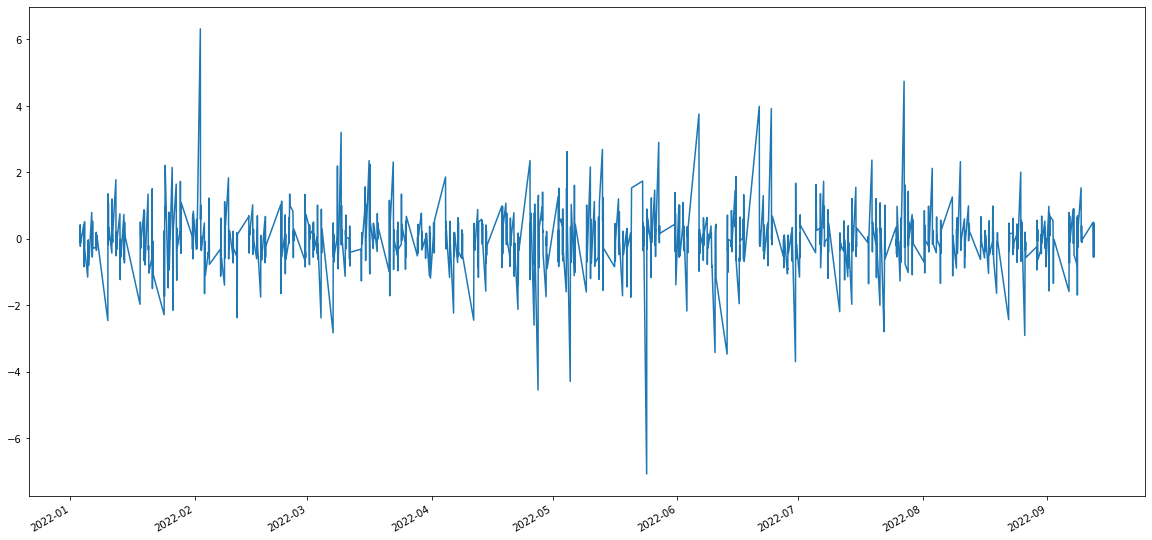

In [7]:
google.loc['2022']['Return'].plot(figsize=(20,10))

<AxesSubplot:>

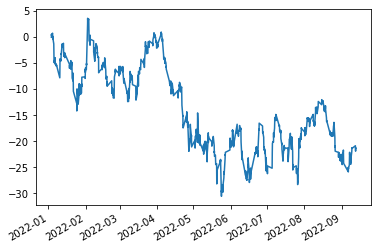

In [8]:
google.loc['2022']['Return'].cumsum().plot()

<AxesSubplot:>

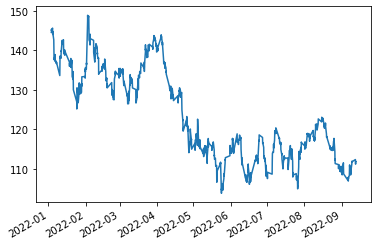

In [9]:
google.loc['2022']["Close"].plot()

<AxesSubplot:>

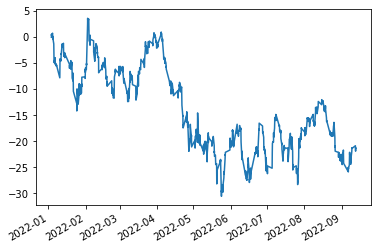

In [12]:
google.loc['2022']['Return'].cumsum().plot()

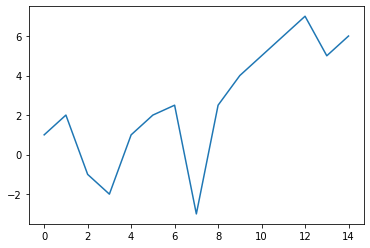

In [15]:
import matplotlib.pyplot as plt
a=[1,2,-1,-2,1,2,2.5,-3,2.5,4,5,6,7,5,6]
plt.plot(a)

In [16]:
import pandas as pd
a_df=pd.DataFrame(a,columns=['a'])

In [17]:
a_df

,a
0,1.0
1,2.0
2,-1.0
3,-2.0
4,1.0
5,2.0
6,2.5
7,-3.0
8,2.5
9,4.0


<AxesSubplot:>

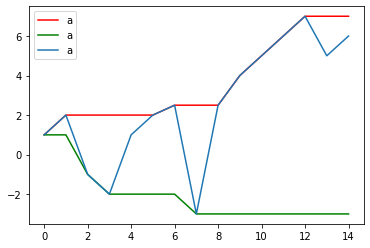

In [18]:
fig,ax=plt.subplots()
a_df.cummax().plot(c='r',ax=ax)
a_df.cummin().plot(c='g',ax=ax)
a_df.plot(ax=ax)

# Pivot points 

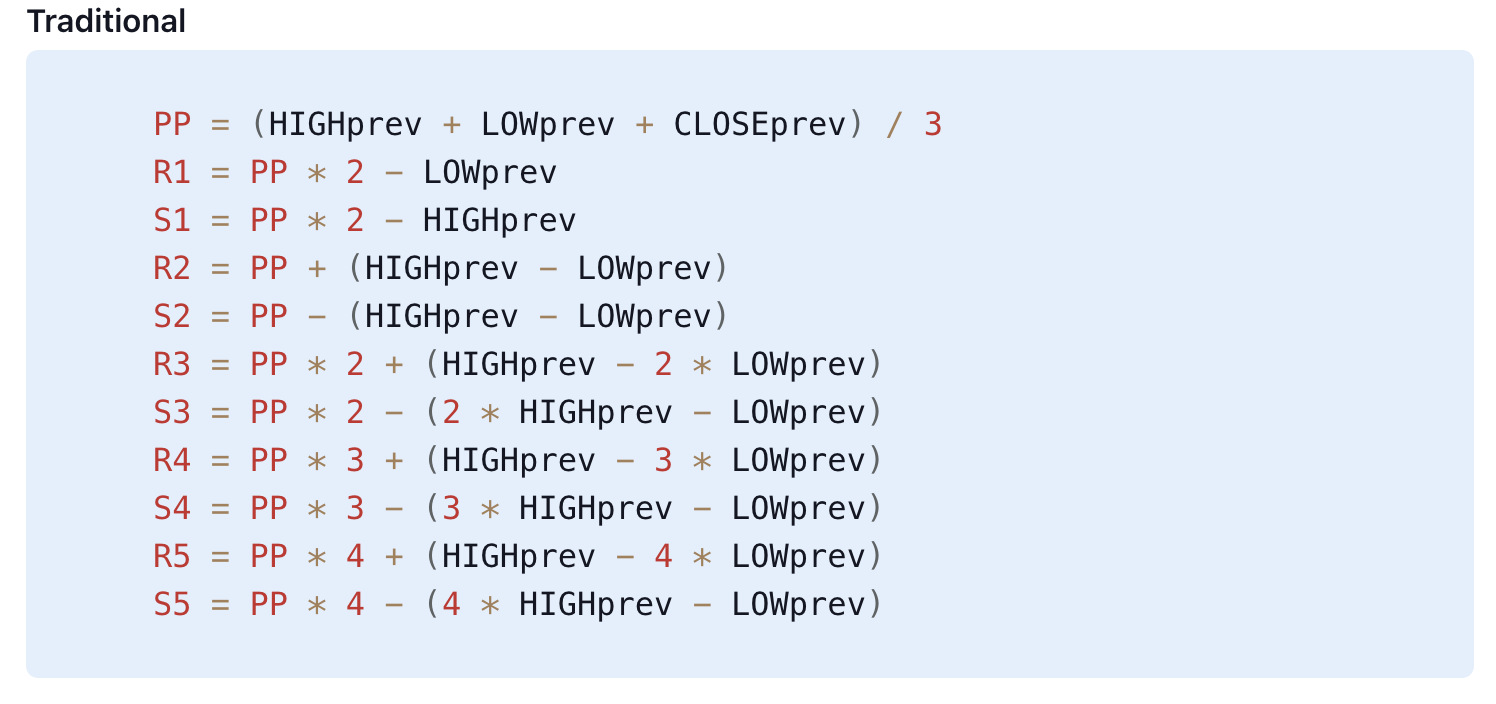

In [20]:
import yfinance as yf
spy_daily=yf.download("SPY",period='max',interval='1d')
stock_daily

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,PP,BC,TC,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334017,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514208,480500,43.89,43.86,43.92,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568285,201300,44.16,44.11,44.21,44.35,44.07,44.44,43.88,44.63,43.79
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838549,529400,44.28,44.25,44.31,44.44,44.18,44.53,44.03,44.68,43.94
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946671,531500,44.68,44.61,44.75,44.98,44.52,45.15,44.21,45.45,44.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,394.940002,397.619995,393.149994,393.279999,393.279999,81367500,395.62,395.31,395.93,397.97,393.88,399.71,391.53,402.06,389.79
2022-12-12,394.109985,398.950012,393.410004,398.950012,398.950012,75405800,394.68,395.38,393.98,396.21,391.74,399.15,390.21,400.68,387.27
2022-12-13,410.220001,410.489990,399.070007,401.970001,401.970001,123782500,397.10,396.18,398.02,400.79,395.25,402.64,391.56,406.33,389.71


In [29]:
spy_weekly=yf.download("spy",period="max",interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [39]:
spy_monthly=yf.download("spy",period="max",interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [40]:
spy_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.968750,45.125000,42.812500,44.406250,25.604301,5.417600e+06
1993-03-01,44.562500,45.843750,44.218750,45.187500,26.054764,3.019200e+06
1993-03-19,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-01,45.250000,45.250000,43.281250,44.031250,25.507996,2.697200e+06
1993-05-01,44.093750,45.656250,43.843750,45.218750,26.195917,1.808000e+06
...,...,...,...,...,...,...
2022-09-16,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,361.079987,389.519989,348.109985,386.209991,386.209991,2.024732e+09
2022-11-01,390.140015,407.679993,368.790009,407.679993,407.679993,1.745985e+09


In [30]:
spy.iloc[-1]

Open         3.943000e+02
High         3.952500e+02
Low          3.878900e+02
Close        3.896300e+02
Adj Close    3.896300e+02
Volume       1.152813e+08
PP           4.004000e+02
BC           4.009000e+02
TC           3.999000e+02
R1           4.044900e+02
S1           3.953000e+02
R2           4.095900e+02
S2           3.912100e+02
R3           4.136800e+02
S3           3.861100e+02
Name: 2022-12-15 00:00:00, dtype: float64

In [31]:
spy.loc['2022-09-09 00:00:00']=spy.iloc[-1]

In [32]:
spy

,Open,High,Low,Close,Adj Close,Volume,PP,BC,TC,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334028,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514210,480500,43.89,43.86,43.92,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568270,201300,44.16,44.11,44.21,44.35,44.07,44.44,43.88,44.63,43.79
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838547,529400,44.28,44.25,44.31,44.44,44.18,44.53,44.03,44.68,43.94
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946671,531500,44.68,44.61,44.75,44.98,44.52,45.15,44.21,45.45,44.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,394.940002,397.619995,393.149994,393.279999,393.279999,81367500,395.62,395.31,395.93,397.97,393.88,399.71,391.53,402.06,389.79
2022-12-12,394.109985,398.950012,393.410004,398.950012,398.950012,75405800,394.68,395.38,393.98,396.21,391.74,399.15,390.21,400.68,387.27
2022-12-13,410.220001,410.489990,399.070007,401.970001,401.970001,123782500,397.10,396.18,398.02,400.79,395.25,402.64,391.56,406.33,389.71


In [99]:
def pivot_daily(df):
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [100]:
def pivot_weekly(df):
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [101]:
def pivot_monthly(df):
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [102]:
pivot_daily(stock_daily)

,Open,High,Low,Close,Adj Close,Volume,PP,BC,TC,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334017,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514208,480500,43.89,43.86,43.92,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568285,201300,44.16,44.11,44.21,44.35,44.07,44.44,43.88,44.63,43.79
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838549,529400,44.28,44.25,44.31,44.44,44.18,44.53,44.03,44.68,43.94
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946671,531500,44.68,44.61,44.75,44.98,44.52,45.15,44.21,45.45,44.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,394.940002,397.619995,393.149994,393.279999,393.279999,81367500,395.62,395.31,395.93,397.97,393.88,399.71,391.53,402.06,389.79
2022-12-12,394.109985,398.950012,393.410004,398.950012,398.950012,75405800,394.68,395.38,393.98,396.21,391.74,399.15,390.21,400.68,387.27
2022-12-13,410.220001,410.489990,399.070007,401.970001,401.970001,123782500,397.10,396.18,398.02,400.79,395.25,402.64,391.56,406.33,389.71


In [103]:
pivot_daily=pivot_daily(stock_daily)

In [104]:
pivot_weekly(spy_weekly)

,Open,High,Low,Close,Adj Close,Volume,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.334028,1003200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.928627,2234800.0,43.89,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.712416,1159800.0,44.68,45.39,44.27,45.80,43.56,46.52,43.14
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.117804,998700.0,44.75,44.97,44.38,45.34,44.16,45.56,43.78
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.604313,1024300.0,43.61,44.41,42.75,45.27,41.95,46.06,41.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21,394.640015,402.929993,392.660004,402.329987,402.329987,210479200.0,396.16,402.18,390.01,408.33,383.99,414.35,377.84
2022-11-28,399.089996,410.000000,393.299988,406.910004,406.910004,426430400.0,399.31,405.96,395.69,409.58,389.04,416.23,385.42
2022-12-05,403.950012,404.929993,391.640015,393.279999,393.279999,363295300.0,403.40,413.50,396.80,420.10,386.70,430.20,380.10


In [105]:
pivot_weekly=pivot_weekly(spy_weekly)

In [106]:
pivot_monthly(spy_monthly)

,Open,High,Low,Close,Adj Close,Volume,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,
1993-02-01,43.968750,45.125000,42.812500,44.406250,25.604301,5.417600e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-01,44.562500,45.843750,44.218750,45.187500,26.054764,3.019200e+06,44.11,45.41,43.10,46.42,41.80,47.72,40.78
1993-03-19,NaN,NaN,NaN,NaN,NaN,NaN,45.08,45.94,44.32,46.70,43.46,47.57,42.69
1993-04-01,45.250000,45.250000,43.281250,44.031250,25.507996,2.697200e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-05-01,44.093750,45.656250,43.843750,45.218750,26.195917,1.808000e+06,44.19,45.10,43.13,46.16,42.22,47.07,41.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16,NaN,NaN,NaN,NaN,NaN,NaN,375.32,393.60,338.91,430.01,320.63,448.29,284.22
2022-10-01,361.079987,389.519989,348.109985,386.209991,386.209991,2.024732e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,390.140015,407.679993,368.790009,407.679993,407.679993,1.745985e+09,374.61,401.11,359.70,416.02,333.20,442.52,318.29


In [107]:
pivot_monthly=pivot_monthly(spy_monthly)

In [108]:
spy_intraday=yf.download('spy',period='60d',interval='5m')
spy_intraday

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-09-22 09:30:00-04:00,376.579987,377.529999,376.500000,377.179993,377.179993,5593166
2022-09-22 09:35:00-04:00,376.440002,377.160004,375.700012,375.799988,375.799988,1805050
2022-09-22 09:40:00-04:00,375.779999,376.149994,375.000000,375.250000,375.250000,1354382
2022-09-22 09:45:00-04:00,375.239990,375.779999,374.899994,375.010010,375.010010,1637892
2022-09-22 09:50:00-04:00,375.010010,375.450012,374.690002,374.929993,374.929993,2212771
...,...,...,...,...,...,...
2022-12-15 15:40:00-05:00,390.000000,390.089996,389.059998,389.059998,389.059998,2091479
2022-12-15 15:45:00-05:00,389.059998,389.350006,388.940002,389.109985,389.109985,2193894
2022-12-15 15:50:00-05:00,389.089996,389.529999,389.040009,389.459991,389.459991,2618152


In [109]:
weekly_pp=pivot_weekly(spy_weekly).iloc[-1]["PP"]
weekly_pp

TypeError: 'DataFrame' object is not callable

In [111]:
#daily pivot point
daily_pp=pivot_daily(stock_daily).loc["2022-12-15"]["PP"]
daily_bc=pivot_daily(stock_daily).loc["2022-12-15"]["BC"]
daily_tc=pivot_daily(stock_daily).loc["2022-12-15"]["TC"]

#weekly pivot point
weekly_pp=pivot_weekly(spy_weekly).iloc[-1]["S1"]
#monthy pivot point
monthly_pp=pivot_monthly(spy_monthly).iloc[-1]["S1"]

TypeError: 'DataFrame' object is not callable

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_8896/1804073025.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  spy_intraday["2022-12-15"]["Close"].plot()


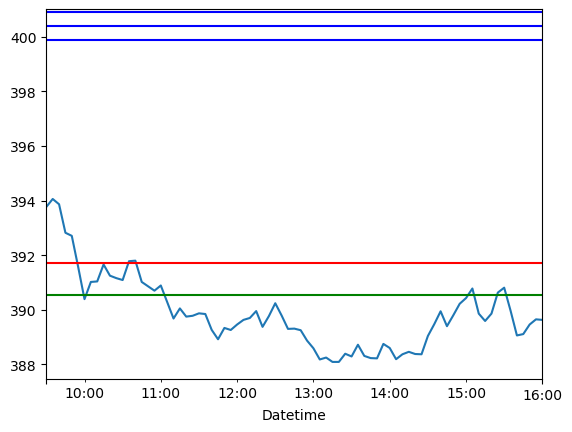

In [112]:
spy_intraday["2022-12-15"]["Close"].plot()
plt.axhline(y=daily_pp,color='b',linestyle='-')
plt.axhline(y=daily_bc,color='b',linestyle='-')
plt.axhline(y=daily_tc,color='b',linestyle='-')
plt.axhline(y=weekly_pp,color='r',linestyle='-')
plt.axhline(y=monthly_pp,color='g',linestyle='-')


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_8896/2447392846.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  spy_intraday["2022-12-15"]["Close"].plot()


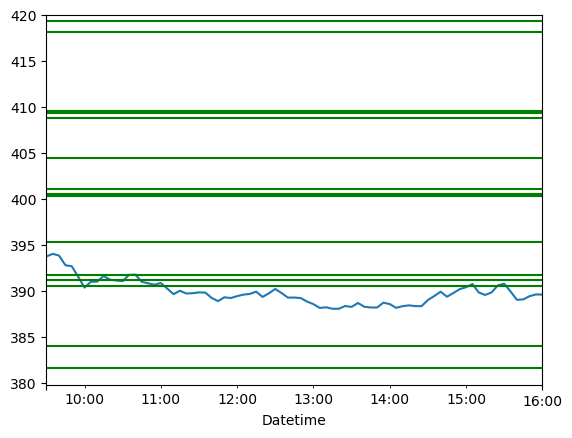

In [118]:
spy_intraday["2022-12-15"]["Close"].plot()

for items in [pivot_daily,pivot_weekly,pivot_monthly]:
    plt.axhline(y=items.iloc[-1]["PP"],color='g',linestyle='-')
    plt.axhline(y=items.iloc[-1]["S1"],color='g',linestyle='-')
    plt.axhline(y=items.iloc[-1]["S2"],color='g',linestyle='-')
    plt.axhline(y=items.iloc[-1]["R1"],color='g',linestyle='-')
    plt.axhline(y=items.iloc[-1]["R2"],color='g',linestyle='-')
    

<AxesSubplot:>

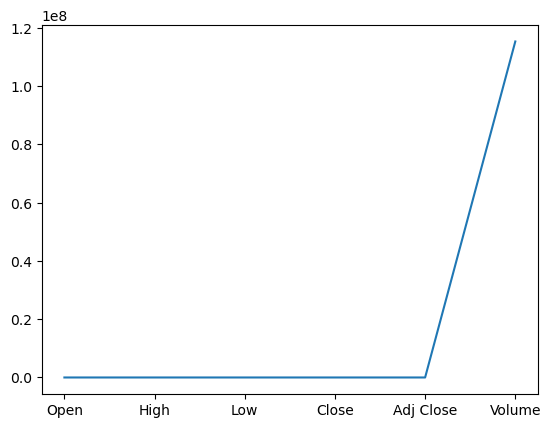

In [114]:
import matplotlib.pyplot as plt
spy_daily.loc['2022-12-15'].plot()
#plt.axhline(y=daily_pp,color='b',linestyle='-')

# Super trend Indicator

In [1]:
#The traditional setting of the SuperTrend indicator is 10 as the lookback period and 3 as the multiplier

In [4]:
def Supertrend(DF,atr_period,multiplier):
    high=df['High']
    low=df['Low']
    close=df['Close']
    
    #calculate ATR
    price_diffs=[high-low,
                high-close.shift(),
                close.shift()-low]
    true_range=pd.concat(price_diffs,axis=1)
    true_range=true_range.abs().max(axis=1)
    #default ATR calculation in supertrend indicator
    atr=true_range.ewm(alpha=1/atr_period,min_periods=atr_period).mean()
    
    #HL2 is simply the average of high and low price
    hl2=(high+low)/2
    
    #Upperband and lower band calculation
    #notice that final bands are set to be equal to the respective bands
    final_upperband=upperband=hl2+(multiplier*atr)
    final_lowerband=lowerband=hl2-(multiplier*atr)
    
    #initialize supertrend column to True
    supertrend=[True]*len(df)
    
    for i in range(1,len(df.index)):
        curr,prev=i,i-1
        
        #if current close price crosses above upperband
        if close[curr]>final_upperband[prev]:
            supertrend[curr]=True
        #if current close price crosses below lowerband
        elif close[curr]<final_lowerband[prev]:
            supertrend[curr]=False
        else:
            supertrend[curr]=supertrend[prev]
            
            #adjustment to the final bands
            if supertrend[curr]==True and final_lowerband[curr]<final_lowerband[prev]:
                final_lowerband[curr]=final_lowerband[prev]
            if supertrend[curr]==False and final_lowerband[curr]>final_lowerband[prev]:
                final_upperband[curr]=final_upperband[prev]
                
        # to remove bands according to the trend direction
        if supertrend[curr]==True:
            final_upperband[curr]=np.nan
        else:
            final_lowerbad[curr]=np.nan
        
        return pd.DataFrame({
            'Supertrend': supertrend,
            'Final Lowerband': final_lowerband,
            'Final Upperband': final_upperband
        },index=df.index)
    

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np

In [15]:
df=yf.download('AAPL',start='2022-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,181.259918,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.959442,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.199158,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.291183,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.460495,86709100
...,...,...,...,...,...,...
2022-10-12,139.130005,140.360001,138.160004,138.339996,138.339996,70433700
2022-10-13,134.990005,143.589996,134.369995,142.990005,142.990005,113224000
2022-10-14,144.309998,144.520004,138.190002,138.380005,138.380005,88512300


In [16]:
supertrend=Supertrend(df,atr_period=10,multiplier=3)
supertrend

,Supertrend,Final Lowerband,Final Upperband
Date,,,
2022-01-03,True,NaN,NaN
2022-01-04,True,NaN,NaN
2022-01-05,True,NaN,NaN
2022-01-06,True,NaN,NaN
2022-01-07,True,NaN,NaN
...,...,...,...
2022-10-12,True,126.387139,152.132865
2022-10-13,True,124.628419,153.331573
2022-10-14,True,126.539584,156.170423


In [17]:
df=df.join(supertrend)

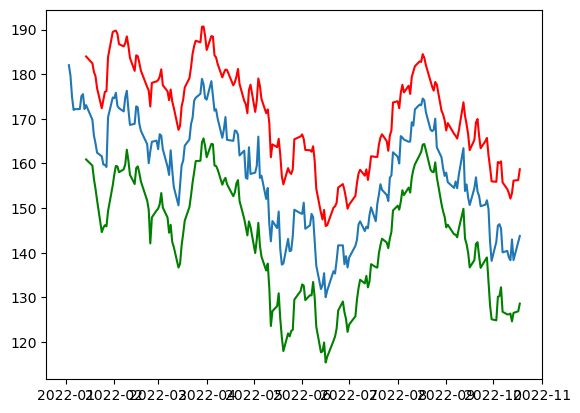

In [19]:
import matplotlib.pyplot as plt
# visualization
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Final Lowerband'], 'g', label = 'Final Lowerband')
plt.plot(df['Final Upperband'], 'r', label = 'Final Upperband')
plt.show()

# Weighted Moving Average

In [13]:
def WMA(DF,n=7):
    df=DF.copy()
    weights=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
    df["WMA"]=df['Adj Close'].rolling(7).apply(lambda x:np.sum(weights*x)/np.sum(weights))
    return df["WMA"]

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
spy=yf.download("SPY",period='60d',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [17]:
WMA(spy)

Datetime
2022-06-28 09:30:00-04:00           NaN
2022-06-28 09:35:00-04:00           NaN
2022-06-28 09:40:00-04:00           NaN
2022-06-28 09:45:00-04:00           NaN
2022-06-28 09:50:00-04:00           NaN
                                ...    
2022-09-21 15:40:00-04:00    381.192497
2022-09-21 15:45:00-04:00    380.262145
2022-09-21 15:50:00-04:00    379.659289
2022-09-21 15:55:00-04:00    378.879292
2022-09-21 16:00:00-04:00    378.334652
Name: WMA, Length: 4681, dtype: float64

In [2]:
spy=yf.download("SPY",period='60d',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [3]:
spy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-25 09:30:00-04:00,395.750000,395.910004,394.839996,394.940002,394.940002,2414690
2022-07-25 09:35:00-04:00,394.959991,394.959991,394.029999,394.380005,394.380005,962379
2022-07-25 09:40:00-04:00,394.389893,395.760010,394.350006,395.559998,395.559998,949970
2022-07-25 09:45:00-04:00,395.549988,395.620087,394.839996,395.059998,395.059998,733698
2022-07-25 09:50:00-04:00,395.059998,395.790009,394.980011,395.440002,395.440002,655171
...,...,...,...,...,...,...
2022-10-17 15:40:00-04:00,366.940002,367.609985,366.779999,367.510010,367.510010,1500951
2022-10-17 15:45:00-04:00,367.500000,367.554993,367.079987,367.159790,367.159790,1693367
2022-10-17 15:50:00-04:00,367.160004,367.600006,367.089996,367.360107,367.360107,3029960


In [4]:
spy=spy['Adj Close']

In [5]:
spy

Datetime
2022-07-25 09:30:00-04:00    394.940002
2022-07-25 09:35:00-04:00    394.380005
2022-07-25 09:40:00-04:00    395.559998
2022-07-25 09:45:00-04:00    395.059998
2022-07-25 09:50:00-04:00    395.440002
                                ...    
2022-10-17 15:40:00-04:00    367.510010
2022-10-17 15:45:00-04:00    367.159790
2022-10-17 15:50:00-04:00    367.360107
2022-10-17 15:55:00-04:00    366.809998
2022-10-17 16:00:00-04:00    366.820007
Name: Adj Close, Length: 4681, dtype: float64